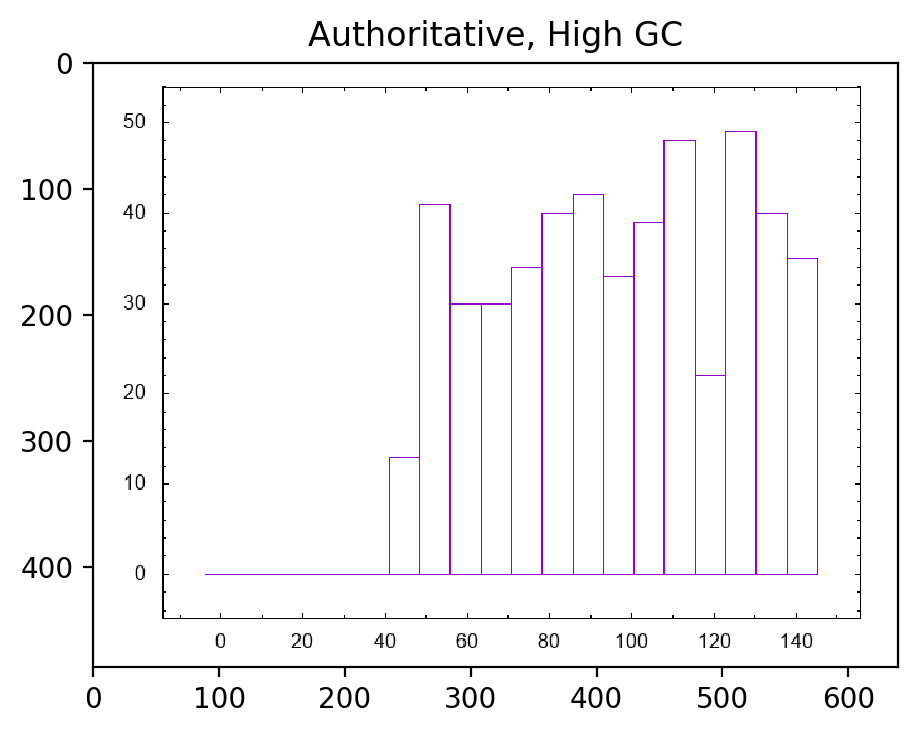

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
auth_highgc = Image.open("./mystery1_authoritative_highgc.png")
auth_lowgc = Image.open("./mystery1_authoritative_lowgc.png")
viterbi_highgc = Image.open("./mystery1_viterbi_highgc.png")
viterbi_lowgc = Image.open("./mystery1_viterbi_lowgc.png")

plt.figure(dpi=200)
plt.title("Authoritative, High GC")
plt.imshow(auth_highgc)

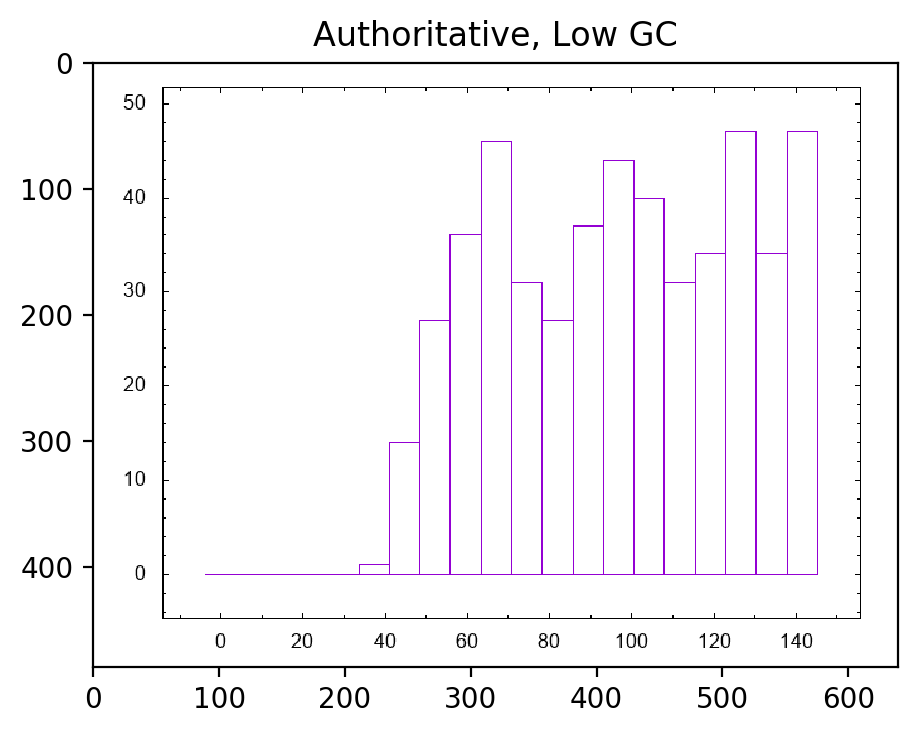

In [22]:
plt.figure(dpi=200)
plt.title("Authoritative, Low GC")
plt.imshow(auth_lowgc)

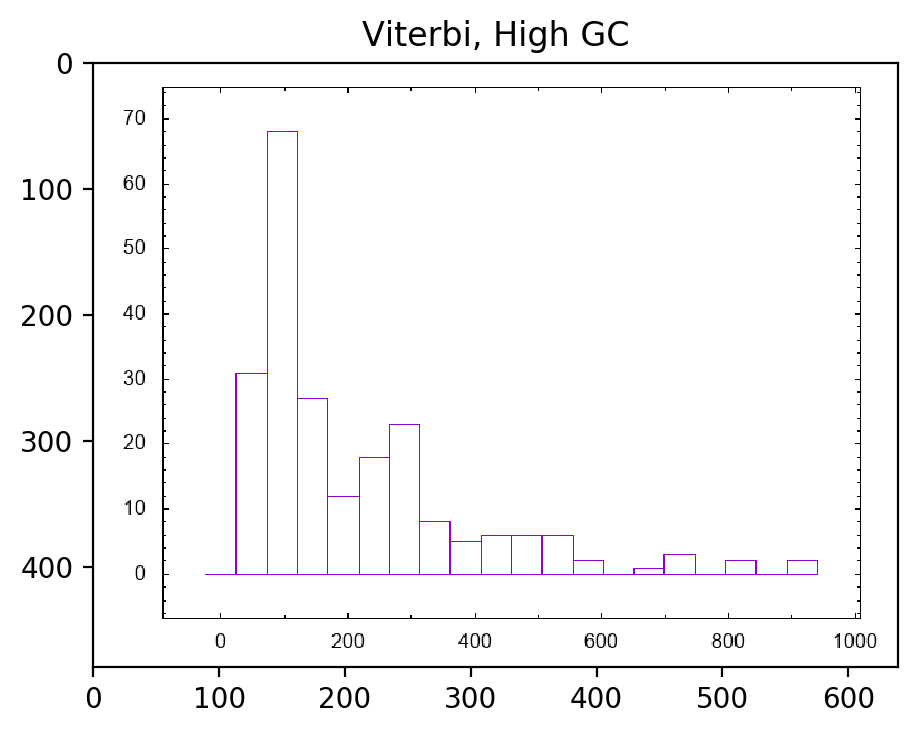

In [23]:
plt.figure(dpi=200)
plt.title("Viterbi, High GC")
plt.imshow(viterbi_highgc)

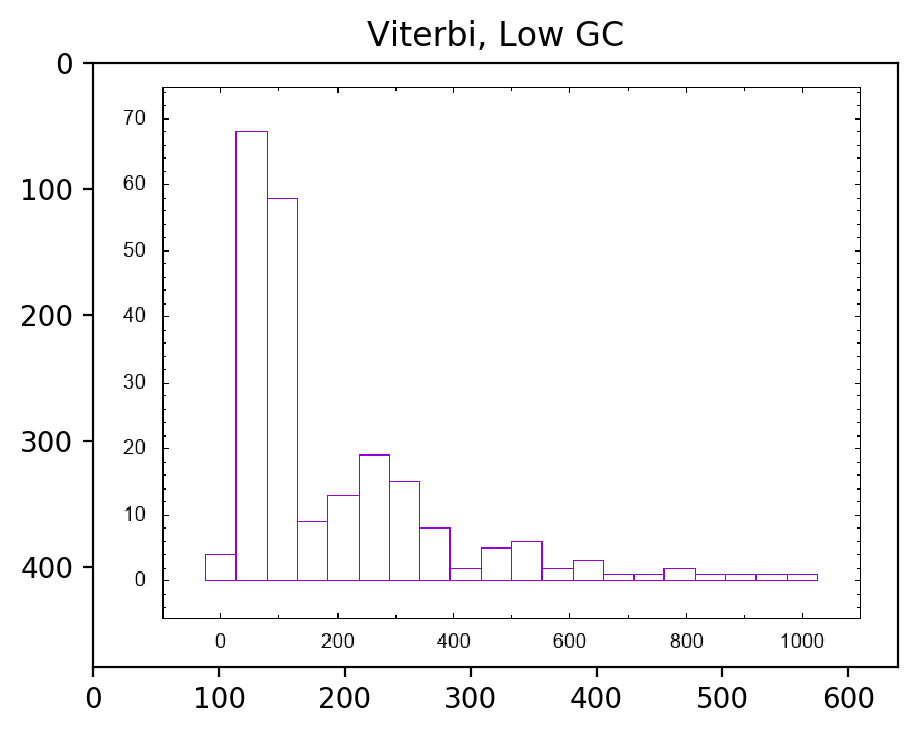

In [24]:
plt.figure(dpi=200)
plt.title("Viterbi, Low GC")
plt.imshow(viterbi_lowgc)

In [27]:
import itertools
import numpy as np

def get_durations(fname):
    with open(fname, "r") as f:
        f.readline()
        auth_dist = f.readline().strip()
        groups = []
        for _, g in itertools.groupby(auth_dist):
            groups.append(''.join(g))
        
        hi = []
        lo = []
        for g in groups:
            if g[0] == "+":
                hi.append(len(g))
            else:
                lo.append(len(g))
        print("HighGC Standard Deviation:", np.std(hi))
        print("LowGC Standard Deviation:", np.std(lo))
        

In [28]:
get_durations("./mystery2")

HighGC Standard Deviation: 9.75381689391389
LowGC Standard Deviation: 10.717506426403485


In [29]:
a = "ATGACAGCCTCCGTGCTCCTCCACCCCCGCTGGATCGAGCCCACCGTCATGTTTCTCTACGACAACGGCGGCGGCCTGGTGGCCGACGAGCTCAACAAGAACATGGAAGGGGCGGCGGCGGCGGCACGGGCGGCGGC--CGGCGGCGGCGGCGGGAGCTGGGGGCGGGGGCTTCCCCCACCCGGCTGCCGCGGCCGCGGGGGGCAACTTCTCGGTGGCCGCAGCGG-CGCCGCCGC--CCGCCGCCGCGGCCAACCAGTGCCGCAACCTGATGGCGCATCCCGCACCCCT--CGCCCGGCGCCGCGGCCGCGTACAGCAGCGCCCCGGGGGAGGCGCCCCCGTCCGCCG-CGCCGCCGCCGCCGCCGCCGCTGCTGC-G-CGCCGCCGCGGCTGCCGCGTCGTCGTCGGGAGGGCCCGGGCCGGCGGGGCCCGCGGGTGCCGAGGCCGCCAAGCAGTGCAGTCCCTGCTCGGCGGCGGCACAGAGCTCGTCGGGGCCCGCGGCGCTGCCCTACGGCTACTTCGGCAGCGGCTACTACCCGTGCGCCCGCATGGGCCCGCACCCCAACGCCATCAAGTCGTGCGCGCAGCCTG-CT---TCG--GCCGCCGCCGCCTTCGCCGACAAGTACATGGACACCGCCGGCCCCGCGGCCGAGGAGTTCAGCTCCCGCGCCAAGGAGTTTGCTTTCTACCATCAGGGCTACGCAGCCGGGCCTTACCACCATCACCAGCCCGTGCCCGGCTACCTGGATATGCCAGTAGTTCCGGGGCTCGGGGGTCCTGGCGAGTCGCGCCACGAGCCTCTGGGGCTTCCCATGGAAAGCTATCAGCCCTGGGCTCTGCCCAACGGCTGGAACGGCCAAATGTACTGCCCCAAAGAGCAGACGCAGCCTCCCCACCTCTGGAAGTCCACTCTGCCCGACGTCGTCTCCCATCCTTCAGACGCCAGCTCCTATAGGAGGGGGAGAAAGAAGCGCGTGCCTTACACTAAGGTGCAGTTGAAAGAACTCGAACGGGAATACGCTACGAACAAATTCATTACCAAGGACAAACGGAGGAGGATATCAGCCACGACAAACCTCTCTGAGAGGCAGGTCACAATCTGGTTCCAGAACAGGAGGGTCAAAGAGAAAAAAGTCATCAATAAACTCAAGACCACTAGTTAA"

In [30]:
b = "ATGACAGCCTCCGTGCTCCTCCACCCCCGCTGGATCGAGCCCACCGTCATGTTTCTCTACGACAACGGCGGCGGCCTGGTGGCCGACGAGCTCAACAAGAACATGGAAGGGGCGGCGGCGGCGGCACGGGCGGCGGC--CGGCGGCGGCGGCGGGAGCTGGGGGCGGGGGCTTCCCCCACCCGGCTGCCGCGGCCGCGGGGGGCAACTTCTCGGTGGCCGCAGCGG-CGCCGCCGC--CCGCCGCCGCGGCCAACCAGTGCCGCAACCTGATGGCGCATCCCGCACCCCT--CGCCCGGCGCCGCGGCCGCGTACAGCAGCGCCCCGGGGGAGGCGCCCCCGTCCGCCG-CGCCGCCGCCGCCGCCGCCGCTGCTGC-G-CGCCGCCGCGGCTGCCGCGTCGTCGTCGGGAGGGCCCGGGCCGGCGGGGCCCGCGGGTGCCGAGGCCGCCAAGCAGTGCAGTCCCTGCTCGGCGGCGGCACAGAGCTCGTCGGGGCCCGCGGCGCTGCCCTACGGCTACTTCGGCAGCGGCTACTACCCGTGCGCCCGCATGGGCCCGCACCCCAACGCCATCAAGTCGTGCGCGCAGCCTG-CT---TCG--GCCGCCGCCGCCTTCGCCGACAAGTACATGGACACCGCCGGCCCCGCGGCCGAGGAGTTCAGCTCCCGCGCCAAGGAGTTTGCTTTCTACCATCAGGGCTACGCAGCCGGGCCTTACCACCATCACCAGCCCGTGCCCGGCTACCTGGATATGCCAGTAGTTCCGGGGCTCGGGGGTCCTGGCGAGTCGCGCCACGAGCCTCTGGGGCTTCCCATGGAAAGCTATCAGCCCTGGGCTCTGCCCAACGGCTGGAACGGCCAAATGTACTGCCCCAAAGAGCAGACGCAGCCTCCCCACCTCTGGAAGTCCACTCTGCCCGACGTCGTCTCCCATCCTTCAGACGCCAGCTCCTATAGGAGGGGGAGAAAGAAGCGCGTGCCTTACACTAAGGTGCAGTTGAAAGAACTCGAACGGGAATACGCTACGAACAAATTCATTACCAAGGACAAACGGAGGAGGATATCAGCCACGACAAACCTCTCTGAGAGGCAGGTCACAATCTGGTTCCAGAACAGGAGGGTCAAAGAGAAAAAAGTCATCAATAAACTCAAGACCACTAGTTAA"

In [31]:
a == b

True

In [87]:
import string

def invert(s):
    translate = str.maketrans("ACGT", "TGCA")
    return s.translate(translate)[::-1]

invert_start = 54549
invert_end = 290551 + 200

def readSeq(filename):
    """reads in a FASTA sequence"""

    stream = open(filename)
    seq = []

    for line in stream:
        if line.startswith(">"):
            continue
        seq.append(line.rstrip())

    return "".join(seq)

original = readSeq("./human-hoxa-region.fa")
inverted = readSeq("./human-hoxa-region-modified.fa")

In [83]:
original[invert_end-2:invert_end+100]

'CTCTGTGCCCTATTGGACAAAATGGGAGTTCCTAGCCCTGGATTCTTGTGAAAGTCGTTACCCGGGGCCCTAGCCAGGGCTTGCAGCCAGTGCAGTAGAAAA'

In [84]:
inverted[invert_end-2:invert_end+100]

'ATCTGTGCCCTATTGGACAAAATGGGAGTTCCTAGCCCTGGATTCTTGTGAAAGTCGTTACCCGGGGCCCTAGCCAGGGCTTGCAGCCAGTGCAGTAGAAAA'

In [90]:
invert(original[invert_start:invert_end]) == inverted[invert_start:invert_end]

True

In [91]:
invert_start, invert_end

(54549, 290751)